In [192]:
import torch
import torch.nn as nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split

In [193]:
data = load_diabetes(as_frame = True)
df = pd.DataFrame(data['data'])
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [194]:
X = torch.tensor(df.values, dtype=torch.float)
y = torch.tensor(data['target'].values, dtype=torch.float).unsqueeze(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=11)
X.shape, y.shape

(torch.Size([442, 10]), torch.Size([442, 1]))

In [195]:
X_train.shape, y_train.shape

(torch.Size([331, 10]), torch.Size([331, 1]))

In [196]:
input = 10
output = 1
model = nn.Linear(input, output)
print(list(model.parameters()))
# print('-----------------')
# print(model.bias)

[Parameter containing:
tensor([[-0.3155, -0.1591, -0.1356,  0.2973,  0.1641, -0.1565,  0.0054, -0.1003,
         -0.2377, -0.1688]], requires_grad=True), Parameter containing:
tensor([-0.1359], requires_grad=True)]


In [197]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [198]:
num_epochs = 10000
def torchlrg(num_epochs, model, loss, optimizer, X_train, y_train):
    global loss_list
    loss_list = []
    print(list(model.parameters()))
    for epoch in range(num_epochs):
        y_pred = model(X_train)
        mse = loss(y_pred, y_train)
        loss_list.append(mse.detach().numpy())
        mse.backward()
        optimizer.step()
        optimizer.zero_grad()
        if epoch % 100 == 0:
            print(f'Current epoch is {epoch}, loss is {mse.item():.2f}')

In [199]:
torchlrg(num_epochs, model, criterion, optimizer, X_train, y_train)

[Parameter containing:
tensor([[-0.3155, -0.1591, -0.1356,  0.2973,  0.1641, -0.1565,  0.0054, -0.1003,
         -0.2377, -0.1688]], requires_grad=True), Parameter containing:
tensor([-0.1359], requires_grad=True)]
Current epoch is 0, loss is 28234.38
Current epoch is 100, loss is 4901.67
Current epoch is 200, loss is 4505.08
Current epoch is 300, loss is 4205.84
Current epoch is 400, loss is 3976.24
Current epoch is 500, loss is 3796.93
Current epoch is 600, loss is 3654.31
Current epoch is 700, loss is 3538.79
Current epoch is 800, loss is 3443.59
Current epoch is 900, loss is 3363.85
Current epoch is 1000, loss is 3296.10
Current epoch is 1100, loss is 3237.79
Current epoch is 1200, loss is 3187.06
Current epoch is 1300, loss is 3142.51
Current epoch is 1400, loss is 3103.11
Current epoch is 1500, loss is 3068.03
Current epoch is 1600, loss is 3036.65
Current epoch is 1700, loss is 3008.46
Current epoch is 1800, loss is 2983.06
Current epoch is 1900, loss is 2960.10
Current epoch is

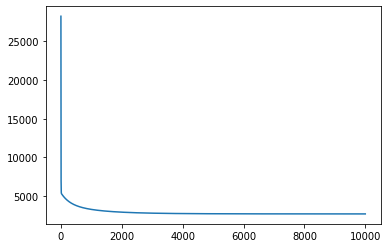

In [200]:
plt.plot(range(num_epochs), loss_list)

In [201]:
preds = model(X_test)
loss = criterion(preds, y_test)
print(f'Total MSE loss: {loss.item():.2f}')


Total MSE loss: 3478.27
